In [1]:
import sys
import matplotlib.colors as clr
import numpy as np
import matplotlib.pyplot as plt
import os
import fitsio as fio
import glob
from tqdm import tqdm
from astropy.io import fits
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

In [2]:
Roman_truth_file = '/global/cscratch1/sd/zg64/Rubin-Roman-Redmagic/dc2_truth_gal_icrs.fits'
aa = fio.FITS(Roman_truth_file)[-1]
Roman_z = aa.read_column('z')

In [3]:
Roman_output_dir = '/global/cscratch1/sd/zg64/Rubin-Roman-Redmagic/dc2_sim_output/'
Roman_match_files = np.sort(glob.glob(os.path.join(Roman_output_dir,'*.fits')))
roman_truth = fio.FITS(Roman_match_files[1])[-1].read()
roman_detection = fio.FITS(Roman_match_files[0])[-1].read()

In [4]:
mm = roman_truth['gal_star'] == 0
roman_ind_all = roman_truth['ind'][mm]

In [5]:
z_all = Roman_z[roman_ind_all]

In [6]:
Red_gal_ind = np.load('data/roman_red_sed_bulge_disk_match_truth_ind.npy')
roman_ind = roman_truth['ind']
matched_inds_in_truth = roman_ind[Red_gal_ind]

zs = Roman_z[matched_inds_in_truth]
measured_qts = roman_detection[Red_gal_ind]
measured_qts_all = roman_detection[mm]

Text(0.5, 0, 'Redshift')

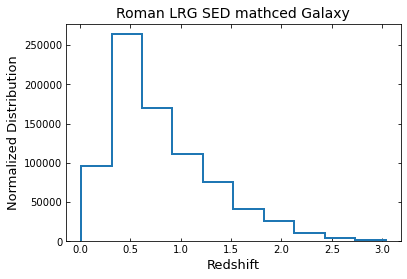

In [8]:
plt.title('Roman LRG SED mathced Galaxy',fontsize = 14)
plt.hist(zs,density = False,histtype='step',linewidth = 2);
plt.ylabel('Normalized Distribution', fontsize = 13)
plt.xlabel('Redshift',fontsize = 13)

In [10]:
roman_z_mask = (z_all > 1.3) & (z_all < 1.32)
z_mask = (zs > 1.3) & (zs < 1.32)
measured_qts[z_mask].shape,measured_qts_all[roman_z_mask].shape

((5881,), (126300,))

In [ ]:
plt.hist

In [140]:
def plot_c_vs_m_roman (ax,c1,c2,ref_m,z_mask,data_z_mask,ref_cut):
    fz = 20
    mag_c1 = measured_qts['mag_auto_%s'%c1][z_mask]
    mag_c2 = measured_qts['mag_auto_%s'%c2][z_mask]
    mag_ref = measured_qts['mag_auto_%s'%ref_m][z_mask]
    color = mag_c1-mag_c2
    #print(color)
    mag_c1_data = measured_qts_all['mag_auto_%s'%c1][data_z_mask]
    mag_c2_data = measured_qts_all['mag_auto_%s'%c2][data_z_mask]
    mag_ref_data = measured_qts_all['mag_auto_%s'%ref_m][data_z_mask]
    color_data = mag_c1_data-mag_c2_data
    
    
    CUT = mag_ref < ref_cut
    CUT_all = mag_ref_data < ref_cut
    
    ax[0].plot(mag_ref_data[CUT_all],color_data[CUT_all],'.')
    ax[0].plot(mag_ref[CUT],color[CUT],'.')
    #ax.hist(color_data[CUT_all])
    #ax.set_ylim(color.mean()-1,color.mean()+1)
    #ax.set_xlim(mag_ref.mean()-5,mag_ref.mean()-1)
    ax[0].set_ylabel('%s-%s'%(c1,c2),fontsize= 20)
    ax[0].set_xlabel(ref_m,fontsize = 20)
    ax[0].set_xlim(19,23)
    ax[1].hist(color_data[CUT_all],bins = 20)
    ax[1].hist(color[CUT],bins = 20)
    print(c1,c2,ref_m)

Y106 J129 F184


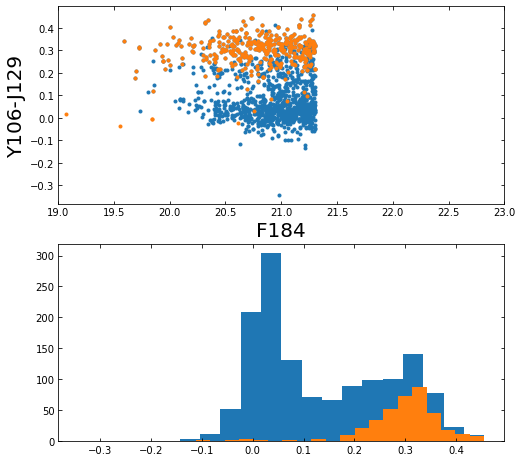

In [168]:
z_low = 1.2
z_high = 1.22
roman_z_mask = (z_all > z_low) & (z_all < z_high)
z_mask = (zs > z_low) & (zs < z_high)
fr = ['Y106','J129','H158','F184']
f,ax = plt.subplots(2,1,figsize = (8,8))
plot_c_vs_m_roman(ax = ax,c1 = fr[0],c2 = fr[1],ref_m=fr[-1],z_mask=z_mask,data_z_mask=roman_z_mask,ref_cut = 21.3025316614033)


Y106 J129 F184


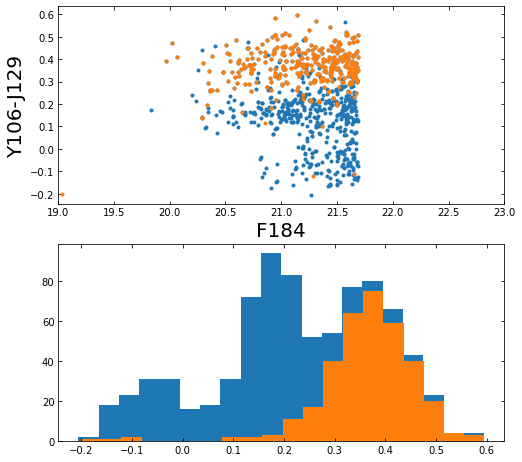

In [167]:
z_low = 1.36
z_high = 1.38
roman_z_mask = (z_all > z_low) & (z_all < z_high)
z_mask = (zs > z_low) & (zs < z_high)
fr = ['Y106','J129','H158','F184']
f,ax = plt.subplots(2,1,figsize = (8,8))
plot_c_vs_m_roman(ax = ax,c1 = fr[0],c2 = fr[1],ref_m=fr[-1],z_mask=z_mask,data_z_mask=roman_z_mask,ref_cut =21.68873573905765)

Y106 J129 H158


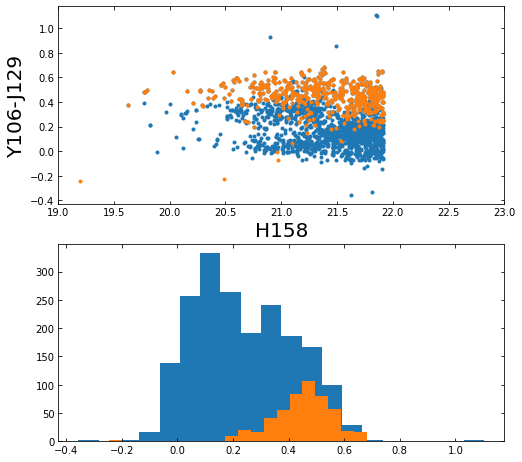

In [157]:
z_low = 1.46
z_high = 1.48
roman_z_mask = (z_all > z_low) & (z_all < z_high)
z_mask = (zs > z_low) & (zs < z_high)

fr = ['Y106','J129','H158','F184']
f,ax = plt.subplots(2,1,figsize = (8,8))
plot_c_vs_m_roman(ax = ax,c1 = fr[0],c2 = fr[1],ref_m=fr[-2],z_mask=z_mask,data_z_mask=roman_z_mask,ref_cut = 21.91466468273375)

J129 H158 F184


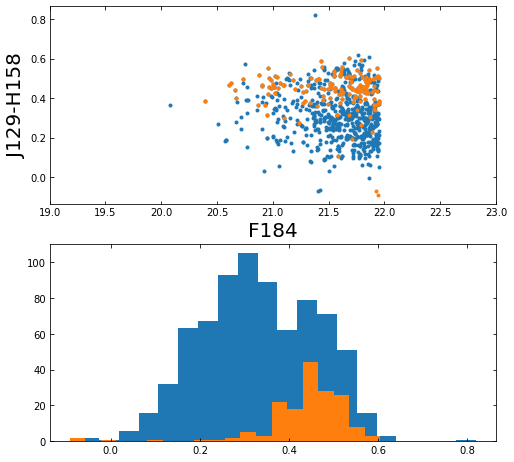

In [166]:
z_low = 1.66
z_high = 1.68
roman_z_mask = (z_all > z_low) & (z_all < z_high)
z_mask = (zs > z_low) & (zs < z_high)

fr = ['Y106','J129','H158','F184']
f,ax = plt.subplots(2,1,figsize = (8,8))
plot_c_vs_m_roman(ax = ax,c1 = fr[1],c2 = fr[2],ref_m=fr[-1],z_mask=z_mask,data_z_mask=roman_z_mask,ref_cut = 21.953503737059705)

J129 H158 F184


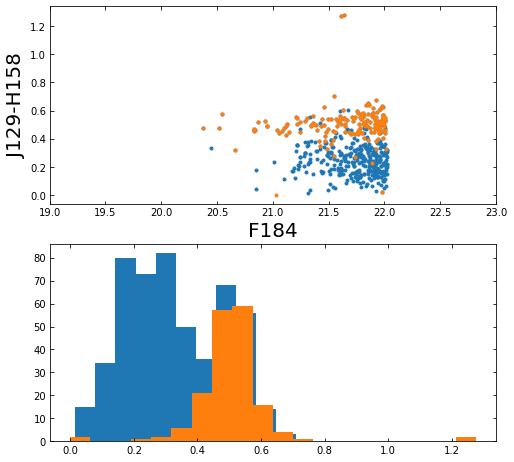

In [165]:
z_low = 1.78
z_high = 1.80
roman_z_mask = (z_all > z_low) & (z_all < z_high)
z_mask = (zs > z_low) & (zs < z_high)

fr = ['Y106','J129','H158','F184']
f,ax = plt.subplots(2,1,figsize = (8,8))
plot_c_vs_m_roman(ax = ax,c1 = fr[1],c2 = fr[2],ref_m=fr[-1],z_mask=z_mask,data_z_mask=roman_z_mask,ref_cut =22.02547275706781)


J129 H158 F184


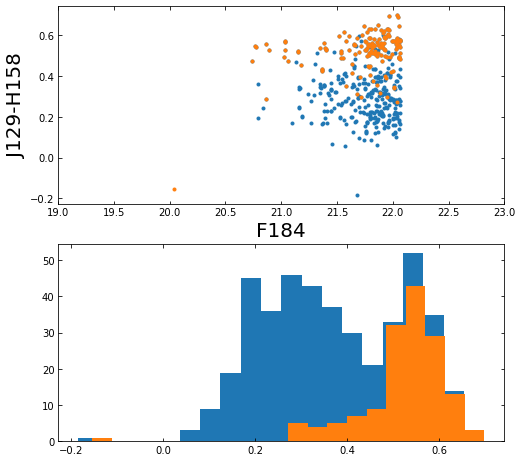

In [164]:
z_low = 1.86
z_high = 1.88
roman_z_mask = (z_all > z_low) & (z_all < z_high)
z_mask = (zs > z_low) & (zs < z_high)

fr = ['Y106','J129','H158','F184']
f,ax = plt.subplots(2,1,figsize = (8,8))
plot_c_vs_m_roman(ax = ax,c1 = fr[1],c2 = fr[2],ref_m=fr[-1],z_mask=z_mask,data_z_mask=roman_z_mask,ref_cut = 22.067818955832657)

J129 H158 F184


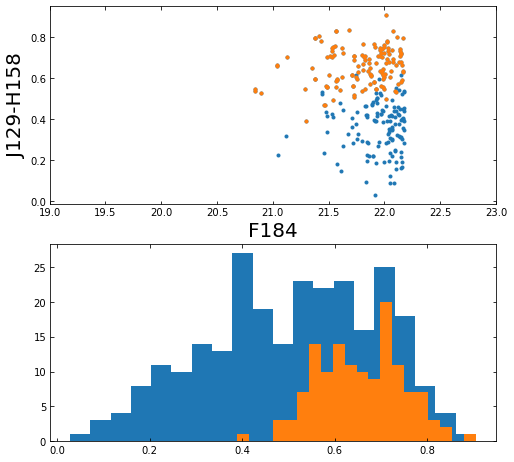

In [163]:
z_low = 2
z_high = 2.02
roman_z_mask = (z_all > z_low) & (z_all < z_high)
z_mask = (zs > z_low) & (zs < z_high)

fr = ['Y106','J129','H158','F184']
f,ax = plt.subplots(2,1,figsize = (8,8))
plot_c_vs_m_roman(ax = ax,c1 = fr[1],c2 = fr[2],ref_m=fr[-1],z_mask=z_mask,data_z_mask=roman_z_mask,ref_cut = 22.177685061794442)

H158 F184 F184


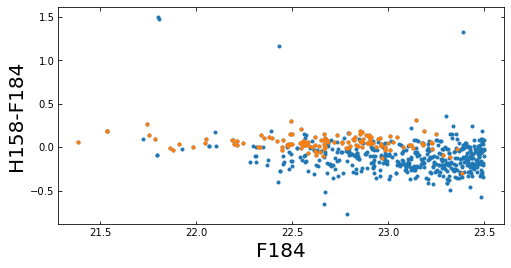

In [23]:
z_low = 2.5
z_high = 2.52
roman_z_mask = (z_all > z_low) & (z_all < z_high)
z_mask = (zs > z_low) & (zs < z_high)

fr = ['Y106','J129','H158','F184']
f,ax = plt.subplots(1,1,figsize = (8,4))
plot_c_vs_m_roman(ax = ax,c1 = fr[2],c2 = fr[3],ref_m=fr[-1],z_mask=z_mask,data_z_mask=roman_z_mask,ref_cut = 23.5)

In [13]:
# strigent l_cut zf = 3.5

l_cut = np.array([20.90311938, 20.94632706, 20.98820976, 21.02932778, 21.06775226,
       21.09859233, 21.12274813, 21.14691088, 21.17307675, 21.2003162 ,
       21.22763632, 21.25495887, 21.28312036, 21.31506326, 21.34815013,
       21.38157509, 21.41497536, 21.44843129, 21.48155162, 21.51443045,
       21.5467735 , 21.57843621, 21.60942377, 21.63972493, 21.66892985,
       21.69576695, 21.72004143, 21.74263532, 21.75295781, 21.76402485,
       21.77587577, 21.7892473 , 21.80557355, 21.8246329 , 21.84372594,
       21.86214973, 21.87929244, 21.89463333, 21.90855661, 21.92152619,
       21.93454869, 21.94764921, 21.95987138, 21.97145724, 21.9823003 ,
       21.99180498, 22.00030364, 22.00905664, 22.01825844, 22.02776185,
       22.03459905, 22.03857932, 22.04228908, 22.04573357, 22.04891788,
       22.04441406, 22.03222693, 22.01979409, 22.0071201 , 21.99420939,
       21.99065577, 21.99646345, 22.00204702, 22.00741048, 22.0125577 ,
       22.02428654, 22.04260069, 22.06070967, 22.07861698, 22.09632604,
       22.10660308, 22.10945136, 22.11211114, 22.11458551, 22.11687751,
       22.11509103, 22.10922895, 22.10319313, 22.09698632, 22.09061121,
       22.08148631, 22.06961417, 22.05758142, 22.04539051, 22.03304382,
       22.01911854, 22.00361698, 21.98796651, 21.97216933, 21.95622758,
       21.93945286, 21.92184722, 21.90410317, 21.88622269, 21.86820771,
       21.84661834, 21.82145644, 21.79616559, 21.77074755, 21.74520407])

In [171]:
# loose l_cut zf = 4

l_cut = np.array([20.95178499, 20.99400209, 21.03550707, 21.07646811, 21.11706601,
       21.15681123, 21.1953987 , 21.23163816, 21.2622983 , 21.28210691,
       21.30253166, 21.32331624, 21.346519  , 21.37250624, 21.39995227,
       21.42792607, 21.45966734, 21.49296676, 21.52656395, 21.56014752,
       21.59352914, 21.62593145, 21.65761243, 21.68873574, 21.71937078,
       21.74911841, 21.7780975 , 21.80653618, 21.83439989, 21.86139135,
       21.88807683, 21.91226601, 21.93446561, 21.95350374, 21.96652984,
       21.9789073 , 21.99036878, 22.00158025, 22.01311884, 22.02547276,
       22.03898007, 22.05320112, 22.06781896, 22.08245357, 22.09666184,
       22.11068804, 22.12457075, 22.13868461, 22.15279203, 22.16604313,
       22.17768506, 22.1890538 , 22.20015466, 22.21099282, 22.22157331,
       22.23259434, 22.24336733, 22.25389691, 22.26418756, 22.27424368,
       22.28014865, 22.28582749, 22.29128423, 22.2965228 , 22.30154705,
       22.29437726, 22.28700052, 22.27942037, 22.27164027, 22.26366359,
       22.26317461, 22.26249556, 22.26162957, 22.26057969, 22.25934892,
       22.27786   , 22.29619594, 22.31435952, 22.33235346, 22.35018042,
       22.35504701, 22.35975174, 22.36429708, 22.36868546, 22.37291925,
       22.37026612, 22.36746298, 22.36451205, 22.36141547, 22.35817539,
       22.35287153, 22.34742828, 22.3418476 , 22.33613147, 22.33028177,
       22.3216173 , 22.31282297, 22.30390057, 22.29485187, 22.28567857])

In [14]:
l_cut.shape

(100,)

In [43]:
(454+507+549+335+274)*250

529750

In [16]:
fr = ['Y106','J129','H158','F184']

In [172]:
redshift_start = np.arange(1,3.0,0.02)
ref_m = 'F184'
for i, z_start in enumerate(redshift_start):
    z_low = z_start
    z_high = z_low + 0.02
    z_mask = (zs > z_low) & (zs < z_high)
    mag_ref = measured_qts['mag_auto_%s'%ref_m][z_mask]
    L_cut = (mag_ref < l_cut[i])
    group_z = zs[z_mask][L_cut]
    
    mag_Y = measured_qts['mag_auto_Y106'][z_mask]
    mag_J = measured_qts['mag_auto_J129'][z_mask]
    mag_H = measured_qts['mag_auto_H158'][z_mask]
    mag_F = measured_qts['mag_auto_F184'][z_mask]
    Y_J = mag_Y[L_cut] - mag_J[L_cut]
    J_H = mag_J[L_cut] - mag_H[L_cut]
    H_F = mag_H[L_cut] - mag_F[L_cut]
    #print(np.round(z_low,2),np.round(z_high,2),len(Y_J),l_cut[i])
    if i == 0:
        Y_J_group = Y_J
        J_H_group = J_H
        H_F_group = H_F
        redshift_group = group_z
    else:
        Y_J_group = np.concatenate((Y_J_group,Y_J))
        J_H_group = np.concatenate((J_H_group,J_H))
        H_F_group = np.concatenate((H_F_group,H_F))
        redshift_group = np.concatenate((redshift_group,group_z))

In [173]:
len(redshift_group)

14616

In [79]:
len(redshift_group)

12569

In [174]:
roman_data_dir = 'data/roman/'
roman_files = os.listdir(roman_data_dir)
if'.ipynb_checkpoints' in roman_files:
    roman_files.remove('.ipynb_checkpoints')
    
roman_redshift = np.arange(0.5,2.75,0.01)

roman_color_comb = [['F062','F087'],['F087','F106'],['F106','F129'],['F129','F158'],['F158','F184'],['F184','F213']]
#roman_color_comb = [['F106','F129'],['F129','F158'],['F158','F184']]

In [ ]:
fig,ax = plt.subplots(6,1,figsize = (8,12))
plt.subplots_adjust(hspace= 0.5)
axv_range = [[0.5,0.9],[0.9,1.4],[1.4,1.9],[1.9,2.55],[2.55,3.3],[3.3,3.9]]

for i,c in enumerate(roman_color_comb[:]):
    #print(i)
    for f in roman_files[:]:
        single_gal_color = np.load(os.path.join(roman_data_dir,f))
        ax[i].plot(roman_redshift,single_gal_color[:,i],ls = '-')
    #ax[i].axvspan(axv_range[i][0],axv_range[i][1],alpha = 0.1)
    ax[i].set_ylabel('%s-%s'%(c[0],c[1]),fontsize = 15)

In [175]:
plot_m = roman_redshift < 2.3

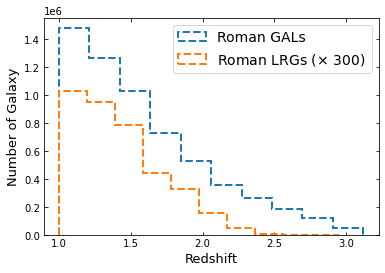

In [83]:
plt.figure(figsize = (6,4))
counts_all,bins_all = np.histogram(z_all[z_all > 1])
counts_lrg,bins_lrg = np.histogram(redshift_group)
plt.hist(bins_all[:-1],bins_all,weights = counts_all,histtype='step',linewidth = 2,ls = '--',label = 'Roman GALs')
plt.hist(bins_lrg[:-1],bins_lrg,weights = counts_lrg*300,histtype='step', linewidth = 2,ls = '--',label = r'Roman LRGs ($\times$ 300)')
plt.ylabel('Number of Galaxy', fontsize = 13)
plt.xlabel('Redshift',fontsize = 13)
plt.legend(loc = 'best',fontsize = 14,frameon= True)
plt.savefig('plots/Roman_GAL_LRG_hist.pdf')

#plt.hist(redshift_group,density = False,histtype='step',linewidth = 2,label = 'LRG SED matched gals w/ L cuts');

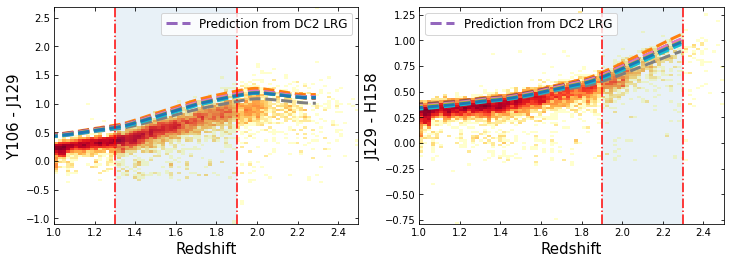

In [92]:
plt.figure(figsize = (12,4))
plt.subplot(121)
for i,f in enumerate(roman_files[-10:]):
    single_gal_color = np.load(os.path.join(roman_data_dir,f))
    plt.plot(roman_redshift[plot_m],single_gal_color[:,2][plot_m],ls = '--',linewidth = 3)
    
    if i == 3:
        plt.plot(roman_redshift[plot_m],single_gal_color[:,2][plot_m],ls = '--',linewidth = 3,label = 'Prediction from DC2 LRG')
plt.hist2d(redshift_group,Y_J_group, bins=100, cmap='YlOrRd', norm=clr.LogNorm());    
plt.axvspan(1.3,1.9,alpha = 0.1)
plt.axvline(1.3,color = 'red',ls = '-.')
plt.axvline(1.9,color = 'red',ls = '-.')
plt.xlim(1,2.5)
plt.ylabel('Y106 - J129',fontsize = 15)
plt.xlabel('Redshift',fontsize = 15)
plt.legend(fontsize = 12,loc = 'best')

plt.subplot(122)
plt.hist2d(redshift_group,J_H_group, bins=100, cmap='YlOrRd', norm=clr.LogNorm(),label = 'Templated matched GAL');
for i,f in enumerate(roman_files[-10:]):
    single_gal_color = np.load(os.path.join(roman_data_dir,f))
    plt.plot(roman_redshift[plot_m],single_gal_color[:,3][plot_m],ls = '--',linewidth = 3)
    if i == 3:
        plt.plot(roman_redshift[plot_m],single_gal_color[:,3][plot_m],ls = '--',linewidth = 3,label = 'Prediction from DC2 LRG')
plt.legend(fontsize = 12,loc = 'best')

plt.axvspan(1.9,2.3,alpha = 0.1)
plt.axvline(1.9,color = 'red',ls = '-.')
plt.axvline(2.3,color = 'red',ls = '-.')
plt.xlim(1,2.5)
plt.ylabel('J129 - H158',fontsize = 15)
plt.xlabel('Redshift',fontsize = 15)
#plt.axvline(1.3)
#plt.axvline(1.8)
plt.savefig('plots/roman_lrg_c_vs_z.pdf')

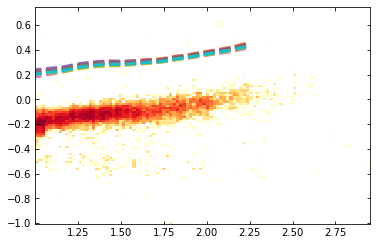

In [101]:
plt.hist2d(redshift_group,H_F_group, bins=100, cmap='YlOrRd', norm=clr.LogNorm());
for f in roman_files[-10:]:
    single_gal_color = np.load(os.path.join(roman_data_dir,f))
    plt.plot(roman_redshift[plot_m],single_gal_color[:,4][plot_m],ls = '--',linewidth = 3)

## More loose condition on L cut

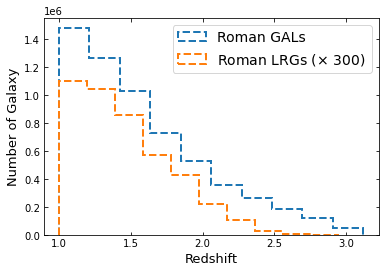

In [176]:
plt.figure(figsize = (6,4))
counts_all,bins_all = np.histogram(z_all[z_all > 1])
counts_lrg,bins_lrg = np.histogram(redshift_group)
plt.hist(bins_all[:-1],bins_all,weights = counts_all,histtype='step',linewidth = 2,ls = '--',label = 'Roman GALs')
plt.hist(bins_lrg[:-1],bins_lrg,weights = counts_lrg*300,histtype='step', linewidth = 2,ls = '--',label = r'Roman LRGs ($\times$ 300)')
plt.ylabel('Number of Galaxy', fontsize = 13)
plt.xlabel('Redshift',fontsize = 13)
plt.legend(loc = 'best',fontsize = 14,frameon= True)
plt.savefig('plots/Roman_GAL_LRG_hist.pdf')

#plt.hist(redshift_group,density = False,histtype='step',linewidth = 2,label = 'LRG SED matched gals w/ L cuts');

Text(0.5, 0, 'Redshift')

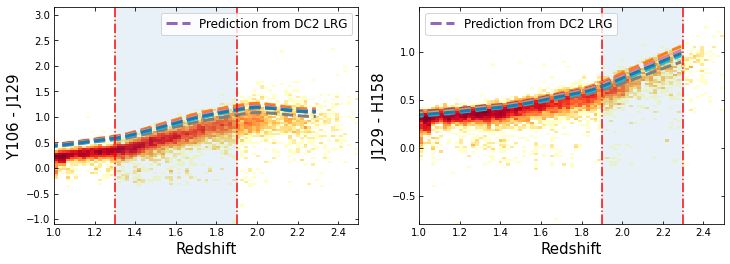

In [177]:
plt.figure(figsize = (12,4))
plt.subplot(121)
for i,f in enumerate(roman_files[-10:]):
    single_gal_color = np.load(os.path.join(roman_data_dir,f))
    plt.plot(roman_redshift[plot_m],single_gal_color[:,2][plot_m],ls = '--',linewidth = 3)
    
    if i == 3:
        plt.plot(roman_redshift[plot_m],single_gal_color[:,2][plot_m],ls = '--',linewidth = 3,label = 'Prediction from DC2 LRG')
plt.hist2d(redshift_group,Y_J_group, bins=100, cmap='YlOrRd', norm=clr.LogNorm());    
plt.axvspan(1.3,1.9,alpha = 0.1)
plt.axvline(1.3,color = 'red',ls = '-.')
plt.axvline(1.9,color = 'red',ls = '-.')
plt.xlim(1,2.5)
plt.ylabel('Y106 - J129',fontsize = 15)
plt.xlabel('Redshift',fontsize = 15)
plt.legend(fontsize = 12,loc = 'best')

plt.subplot(122)
plt.hist2d(redshift_group,J_H_group, bins=100, cmap='YlOrRd', norm=clr.LogNorm(),label = 'Templated matched GAL');
for i,f in enumerate(roman_files[-10:]):
    single_gal_color = np.load(os.path.join(roman_data_dir,f))
    plt.plot(roman_redshift[plot_m],single_gal_color[:,3][plot_m],ls = '--',linewidth = 3)
    if i == 3:
        plt.plot(roman_redshift[plot_m],single_gal_color[:,3][plot_m],ls = '--',linewidth = 3,label = 'Prediction from DC2 LRG')
plt.legend(fontsize = 12,loc = 'best')

plt.axvspan(1.9,2.3,alpha = 0.1)
plt.axvline(1.9,color = 'red',ls = '-.')
plt.axvline(2.3,color = 'red',ls = '-.')
plt.xlim(1,2.5)
plt.ylabel('J129 - H158',fontsize = 15)
plt.xlabel('Redshift',fontsize = 15)
#plt.axvline(1.3)
#plt.axvline(1.8)